# Exercise sheet 2

__Handout date:__ 23.05.2024  
__Submission deadline:__ 19.06.2024 - 23:59  
__Topics:__ Classification.  
__Submission link:__ https://fz-juelich.sciebo.de/s/qwm3ipclLcnfyOohttps://fz-juelich.sciebo.de/s/qwm3ipclLcnfyOo

Add your answers by editing the marked cells. Keep your answers brief and clear.

## MNIST - Dataset

-- __Task__: Load the MNIST-dataset from scikit-learn

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
mnist = datasets.load_digits()

In [2]:
mnist

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

-- __Task__: Split the dataset into train- (70%), validation- (20%) and test-dataset (10%) (with [sklearn - train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html))

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.1, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.22, random_state=1)

-- __Task__: Visualize the first training example of each class

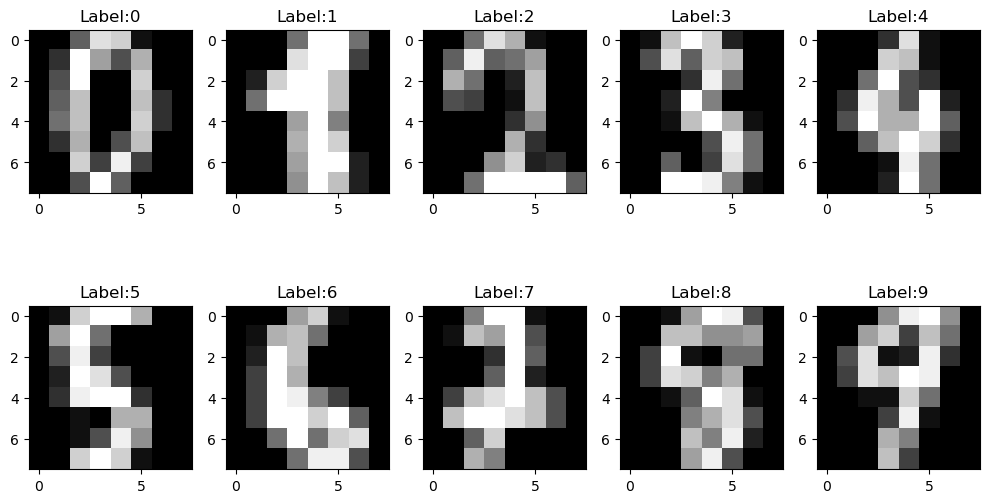

In [4]:
num = np.unique(y_train)
ind_1st = [list(y_train).index(x) for x in num]
image = mnist.images
plt.figure(figsize=(10,6), layout="tight")
for i in range(len(ind_1st)):
    plt.subplot(2, 5, i+1)
    plt.gca().set_title("Label:{}".format(y_train[ind_1st[i]]))
    plt.imshow(X_train[ind_1st[i]].reshape((8,8)), cmap="gray")
plt.show()

## kNN - Classification

There are two hyperparameters for kNN-Classification: the distance metric and k. In this exercise we will use the Manhattan distance (L1), and will find the optimal k.

-- __Question__: Name one advantage and one disadvantage of kNN-Classification.

__Answer__: There is no training process for kNN, but long testing process.

-- __Task__: Choose k=1. Calculate a kNN model with k=1 using the scikit-learn package. Only use the training dataset for the model.

In [5]:
from sklearn.neighbors import KNeighborsClassifier as knn
neigh = knn(metric='l1', n_neighbors=1)
neigh.fit(X_train, y_train)

KNeighborsClassifier(metric='l1', n_neighbors=1)

-- __Task__: Calculate the prediction of this model for the validation datset.

In [6]:
val_pre = neigh.predict(X_val)

-- __Task__: Repeat these steps for k=1 to 10.

In [7]:
class knn_model:

    
    def __init__(self, x_train, y_train, x_test, y_test, k):
        self.x_train = x_train
        self.y_train = y_train
        self.x_test = x_test
        self.y_test = y_test
        self.k = k

    
    def knn_train(self):
        nei = knn(metric='l1', n_neighbors=self.k)
        nei.fit(self.x_train, self.y_train)
        return nei
        
    
    def knn_pre(self, m):
        p = m.predict(self.x_test)
        acc = m.score(self.x_test, self.y_test)
        return p, acc


In [8]:
k_acc = []
for k in range(10):
    m1 = knn_model(X_train, y_train, X_val, y_val, k+1)
    neis = m1.knn_train()
    accs = m1.knn_pre(neis)
    k_acc.append(accs[1])

-- __Task__: Plot the accuracy for k=1 to 10. Choose the best k.

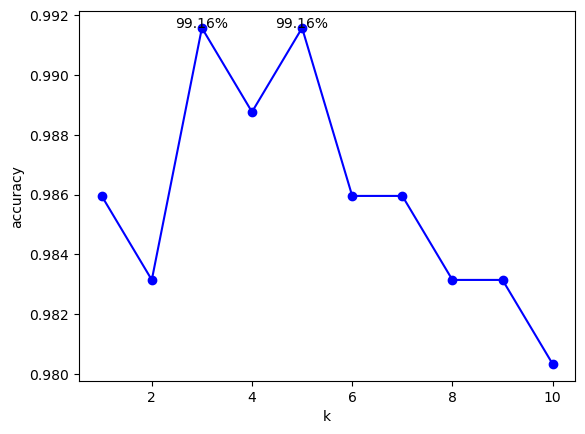

In [9]:
a = [x for x in range(1,11)]
fig, ax = plt.subplots()
ax.plot(a, k_acc, 'bo-')
ax.set(xlabel='k', ylabel='accuracy')
plt.text(3, k_acc[2], "%.2f%%" %(k_acc[2]*100), ha='center')
plt.text(5, k_acc[4], "%.2f%%" %(k_acc[4]*100), ha='center')
plt.show()

-- __Task__: Train a new kNN model with your chosen k and the train- and validation-dataset.

In [10]:
m2 = knn_model(X_train, y_train, X_test, y_test, k=5)
n2 = m2.knn_train()

-- __Task__: Evaluate the final model on the test-dataset.

In [11]:
pred, accu = m2.knn_pre(n2)
accu

0.9944444444444445

-- __Task__: Plot a [confusion matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) of the model on the test-dataset.

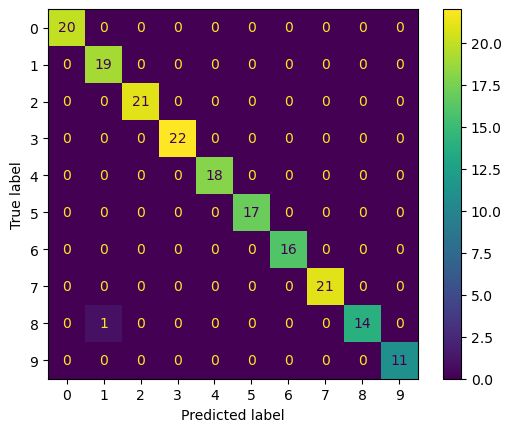

In [12]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, pred, labels= n2.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix= cm, display_labels= n2.classes_)
disp.plot()
plt.show()

-- __Question__: Which two classes are confused the most? Does this results surprise you?

__Answer__: Class 8; Yes, accuracy, presition and recall are quite high.

## PCA and linear classification

In these next tasks we want to compute simple features and use them to train a linear classifier.

--__Task__: Calculate a [PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) for the training dataset.

-- __Task__: Choose as many principal components as needed to reach 90% explained variance.

In [13]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.9, svd_solver='full')
pca.fit(X_train)
n_comp = len(pca.explained_variance_ratio_)
n_comp

21

-- __Task__: Train a [linear classifier](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html#sklearn.linear_model.Perceptron) with these principal components.

In [14]:
from sklearn.linear_model import LogisticRegression
X_new = pca.fit_transform(X_train)
clf = LogisticRegression(max_iter=10000).fit(X_new, y_train)

-- __Task__: Compute the accuracy for this model on the test-dataset.

In [15]:
X_new_test = pca.transform(X_test)
accu_logi = clf.score(X_new_test, y_test)
accu_logi

0.9388888888888889

## MLP classification

Training a CNN neural network is too complex for a exercise sheet, but we will revisit them for our next project. In this exercise we will train a multi-layer-perceptron for the classification task on the MNIST-dataset.

-- __Task__: Normalize the training data to `mean=0` and `std=1`.

In [32]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X_train)
X_scaled = scaler.transform(X_train)

-- __Task__: Fit an [MLP](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier) with appropriate hyperparameters.

In [37]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(hidden_layer_sizes=(512,), batch_size=50, max_iter=500, random_state=1).fit(X_scaled, y_train)

-- __Task__: Apply the model to the test dataset (don't forget to normalize the test dataset).

In [41]:
X_test_scaled = preprocessing.StandardScaler().fit(X_test).transform(X_test)
pred_mlp = clf.predict(X_test_scaled)
accu_mlp = clf.score(X_test_scaled, y_test)

-- __Task__: Calculate the confusion matrix for the test dataset.

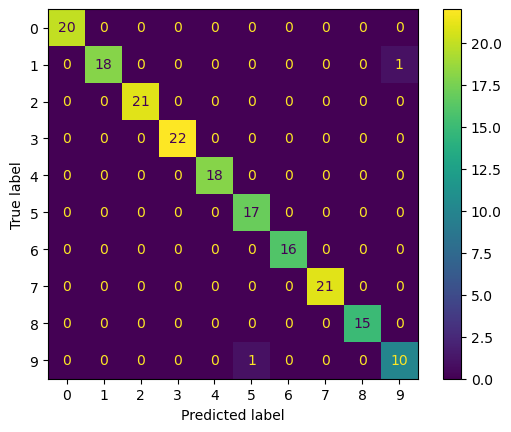

In [43]:
cm_mlp = confusion_matrix(y_test, pred_mlp, labels= clf.classes_)
disp_mlp = ConfusionMatrixDisplay(confusion_matrix= cm_mlp, display_labels = clf.classes_)
disp_mlp.plot()
plt.show()

## Comparison

-- __Task__: Plot the accuracy of all three models (kNN, PCA + Linear and MLP).

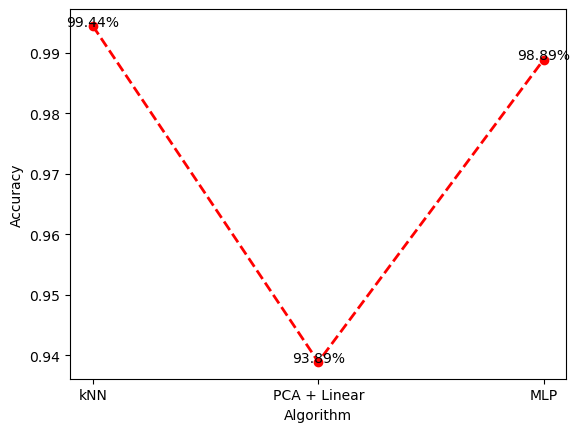

In [48]:
X_plot = [0, 1, 2]
y_plot = [accu, accu_logi, accu_mlp]
plt.plot(X_plot, y_plot, 'ro', linewidth=2.0, linestyle='--')
plt.xticks(X_plot, ['kNN', 'PCA + Linear', 'MLP'])
plt.xlabel('Algorithm')
plt.ylabel('Accuracy')
for x, y in zip(X_plot, y_plot):
    plt.text(x, y, "%.2f%%" %(y*100), ha='center')
plt.show()

-- __Task__: Choose the best model and think of a possible improvement.

In [54]:
m3 = knn_model(X_scaled, y_train, X_test_scaled, y_test, k=5)
n3 = m3.knn_train()
pred_imp, accu_imp = m3.knn_pre(n3)
print("To improve our kNN, we normalize the training data before training the model, and the improved accuracy is: %.2f%%" %(accu_imp*100))

To improve our kNN, we normalize the training data before training the model, and the improved accuracy is: 100.00%
